In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
rnd = np.random
rnd.seed(0)

In [9]:
# n is the number of clients
n = 10
# random generged coordinator for clinets
xc = rnd.rand(n + 1) * 200
yc = rnd.rand(n + 1) * 100

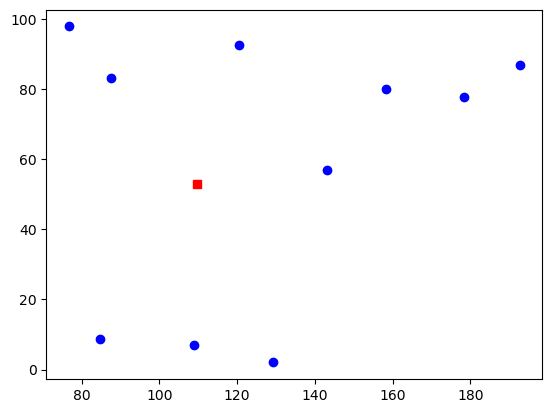

In [11]:
# set the first set of coordinate as depot
plt.plot(xc[0], yc[0], c='r', marker = 's')
# 
plt.scatter(xc[1:], yc[1:], c='b')

In [23]:
# create index for clients
N = [i for i in range(1, n+1)]
# set of Vertics
V = [0] + N
# set of Arcs
A = [(i, j) for i in V for j in V if i != j]
# cost of travel, distance, gas or time
# for this model we use distance
# c distance matrixs
c = {(i, j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i, j in A}
# number of vehicle
Q = 20
# randomly generated amount that need to be delivered
q = {i: rnd.randint(1, 10) for i in N}

In [38]:
V

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [37]:
A

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (1, 0),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (2, 0),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 8),
 (7, 9),
 (7, 10),
 (8, 0),
 (8, 1),
 (8, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (8, 9),
 (8, 10),
 (9, 0),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 6),
 (9, 7),
 (9, 8),
 (9, 10),
 (10, 0),
 (10, 1),
 (10, 2),
 (10, 3),
 (10, 4),
 (10, 5),
 (10, 6),
 (10, 7),
 (10, 8),


In [24]:
q


{1: 4, 2: 4, 3: 4, 4: 8, 5: 1, 6: 2, 7: 1, 8: 5, 9: 8, 10: 4}

In [28]:
c

{(0, 1): 33.504686960860795,
 (0, 2): 41.11138629503385,
 (0, 3): 45.79263333713419,
 (0, 4): 50.77555203012287,
 (0, 5): 54.44725732628541,
 (0, 6): 37.647574061136034,
 (0, 7): 72.98056771655875,
 (0, 8): 89.70844922828567,
 (0, 9): 55.82497026893104,
 (0, 10): 55.59374885917202,
 (1, 0): 33.504686960860795,
 (1, 2): 42.23764921128614,
 (1, 3): 60.2523224726414,
 (1, 4): 75.58102299795816,
 (1, 5): 56.50848025794605,
 (1, 6): 61.502187540784085,
 (1, 7): 41.094312512967974,
 (1, 8): 58.14985245467972,
 (1, 9): 78.02546809638228,
 (1, 10): 27.720843893358516,
 (2, 0): 41.11138629503385,
 (2, 1): 42.23764921128614,
 (2, 3): 86.23654979493304,
 (2, 4): 91.17823243082672,
 (2, 5): 90.94783124977752,
 (2, 6): 34.318704181986625,
 (2, 7): 59.65272609703002,
 (2, 8): 72.39358384965435,
 (2, 9): 44.18366319713841,
 (2, 10): 39.85130178750766,
 (3, 0): 45.79263333713419,
 (3, 1): 60.2523224726414,
 (3, 2): 86.23654979493304,
 (3, 4): 24.29902805451533,
 (3, 5): 20.831530577252774,
 (3, 6): 79

In [25]:
# start using gurobi modeling the cvrp
from gurobipy import Model, GRB, quicksum

In [26]:
mdl = Model('CVRP')

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-15


In [27]:
# adding variable of location index
x = mdl.addVars(A, vtype=GRB.BINARY)
# adding variable of number of client to the model
u = mdl.addVars(N, vtype=GRB.CONTINUOUS)

In [29]:
x

{(0, 1): <gurobi.Var *Awaiting Model Update*>,
 (0, 2): <gurobi.Var *Awaiting Model Update*>,
 (0, 3): <gurobi.Var *Awaiting Model Update*>,
 (0, 4): <gurobi.Var *Awaiting Model Update*>,
 (0, 5): <gurobi.Var *Awaiting Model Update*>,
 (0, 6): <gurobi.Var *Awaiting Model Update*>,
 (0, 7): <gurobi.Var *Awaiting Model Update*>,
 (0, 8): <gurobi.Var *Awaiting Model Update*>,
 (0, 9): <gurobi.Var *Awaiting Model Update*>,
 (0, 10): <gurobi.Var *Awaiting Model Update*>,
 (1, 0): <gurobi.Var *Awaiting Model Update*>,
 (1, 2): <gurobi.Var *Awaiting Model Update*>,
 (1, 3): <gurobi.Var *Awaiting Model Update*>,
 (1, 4): <gurobi.Var *Awaiting Model Update*>,
 (1, 5): <gurobi.Var *Awaiting Model Update*>,
 (1, 6): <gurobi.Var *Awaiting Model Update*>,
 (1, 7): <gurobi.Var *Awaiting Model Update*>,
 (1, 8): <gurobi.Var *Awaiting Model Update*>,
 (1, 9): <gurobi.Var *Awaiting Model Update*>,
 (1, 10): <gurobi.Var *Awaiting Model Update*>,
 (2, 0): <gurobi.Var *Awaiting Model Update*>,
 (2, 1): <g

In [32]:
# setup the goal of this model going to achieve
# minimize the total distance
mdl.modelSense = GRB.MINIMIZE
mdl.setObjective(quicksum(x[i,j]*c[i,j] for i,j in A))

In [33]:
# adding constraints for the model
mdl.addConstrs(quicksum(x[i, j] for j in V if j != i) == 1 for i in N)
mdl.addConstrs(quicksum(x[i, j] for i in V if i != j) == 1 for j in N)
mdl.addConstrs((x[i, j] == 1) >> (u[i]+q[j] == u[j])
               for i, j in A if i != 0 and j != 0)
mdl.addConstrs(u[i] >= q[i] for i in N)
mdl.addConstrs(u[i] <= Q for i in N)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>}

In [34]:
mdl.Params.MIPGap = 0.1
mdl.Params.TimeLimit = 30  # seconds
mdl.optimize()

Set parameter MIPGap to value 0.1
Set parameter TimeLimit to value 30
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[arm] - Darwin 21.5.0 21F79)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 40 rows, 120 columns and 220 nonzeros
Model fingerprint: 0x949b8c87
Model has 90 general constraints
Variable types: 10 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
  GenCon rhs range [1e+00, 8e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 93 rows and 0 columns
Presolve removed 0 rows and 14 columns
Presolve time: 0.03s
Presolved: 133 rows, 106 columns, 602 nonzeros
Variable types: 16 continuous, 90 integer (90 binary)
Found heuristic solution: objective 717.5891594

Root relaxation: objective 3.077459e+02, 41 iterations, 0.00 seconds (0.00 work units)

    No

In [39]:
active_arcs = [a for a in A if x[a].x > 0.999]

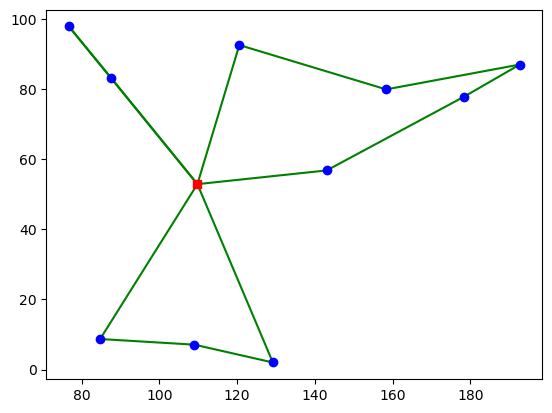

In [40]:
for i, j in active_arcs:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='g', zorder=0)
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')

In [42]:
active_arcs

[(0, 2),
 (0, 4),
 (0, 6),
 (1, 0),
 (2, 10),
 (3, 5),
 (4, 3),
 (5, 0),
 (6, 9),
 (7, 1),
 (8, 7),
 (9, 0),
 (10, 8)]